# **<font color="blue"><b>Machine Learning : Régression Linéaire Multiple pour la Prédiction des Prix des Maisons</b></font>**



 > ### **Nom de l'etudiant :**  Mehdi ATTAOUI

Nous allons construire un modèle de régression linéaire pour un ensemble de données sur les prix des maisons. Le jeu de données se compose des caractéristiques suivantes : surface, nombre de pièces et âge, qui sont des variables indépendantes, et le prix, qui est la variable dépendante. Nous allons prédire les prix des maisons en fonction de ces caractéristiques.


# Processus de réalisation de la régression linéaire multiple

## **Étape 1 : Introduction à la régression linéaire**
Comprendre le concept de régression linéaire multiple et son importance. Il s'agit de modéliser la relation entre une variable cible et plusieurs variables explicatives.

---

## **Étape 2 : Chargement et exploration des données**
1. Charger les données depuis le fichier mul3_prix_maisons.csv.
2. Afficher un aperçu des données (échantillons, colonnes, types de données, valeurs manquantes).
3. Identifier les variables explicatives (ég. surface, nombre de pièces, âge) et la variable cible (prix).

---

## **Étape 3 : Préparation des données**
1. Diviser les données en ensembles d'entraînement (train) et de test (test).
2. Normaliser les variables explicatives si nécessaire (notamment pour la descente de gradient).

---

## **Étape 4 : Réalisation de la régression linéaire multiple**
### **4.1 Utilisation de la formule analytique**
1. Ajouter une colonne de biais (ég. une colonne de 1 pour l'interception).
2. Calculer les coefficients à l'aide de la formule :
   $\theta = (X^T X)^{-1} X^T y $
3. Effectuer des prédictions sur l'ensemble de test.

### **4.2 Utilisation de la descente de gradient**
1. Implémenter l'algorithme de descente de gradient :
   - Initialiser les coefficients $ \beta $ à 0.
   - Mettre à jour les coefficients à chaque itération :
     $ \beta = \beta - \text{learning rate} \times \text{gradients}$
2. Choisir un taux d'apprentissage (learning rate) et un nombre d'époques.
3. Calculer les coefficients et effectuer des prédictions.

### **4.3 Utilisation de Scikit-learn**
1. Initialiser un modèle de régression linéaire avec `LinearRegression()`.
2. Entraîner le modèle sur les données d'entraînement.
3. Effectuer des prédictions sur l'ensemble de test.

---

## **Étape 5 : Évaluation des modèles**
1. Calculer les métriques de performance pour chaque méthode :
   - Coefficient de détermination \( R^2 \).
   - Erreur quadratique moyenne (MSE).
2. Comparer les performances des différentes méthodes.

---

## **Étape 6 : Visualisation des résultats**
1. Créer un graphique pour comparer les valeurs prédites et les valeurs réelles.
2. Inclure une ligne idéale (diagonale) pour visualiser la précision.
3. Ajouter une légende et des annotations pour faciliter l'interprétation.

---

## **Étape 7 : Conclusions**
1. Interpréter les performances des différentes méthodes.
2. Identifier les points forts et les limites de l'approche.
3. Discuter des améliorations potentielles pour des prédictions futures.



# **<font color="blue"><b>Reponses : </b></font>**


**Étape 2 : Chargement et exploration des données**

<font color="yellow">1-Charger les données :</font>

In [ ]:
import pandas as pd

# Charger les données depuis un fichier CSV
data = pd.read_csv('mul3_prix_maisons.csv')

# Affichage d'un aperçu des données
print(data.head())
print(data.info())
print(data.describe())

# Vérification des valeurs manquantes
print("Valeurs manquantes :\n", data.isnull().sum())

   Surface_m2  Nombre_pieces  Age_ans    Prix_Euros
0   68.690215              1       26  7.950231e+05
1  143.592860              4       21  1.769788e+06
2  115.159212              5       30  1.595208e+06
3   97.825603              4       23  1.298075e+06
4   40.282423              5        9  7.215434e+05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Surface_m2     100 non-null    float64
 1   Nombre_pieces  100 non-null    int64  
 2   Age_ans        100 non-null    int64  
 3   Prix_Euros     100 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.2 KB
None
       Surface_m2  Nombre_pieces     Age_ans    Prix_Euros
count  100.000000     100.000000  100.000000  1.000000e+02
mean    81.123497       2.910000   15.900000  1.049805e+06
std     38.673623       1.400541    9.628976  4.049989e+05
min     20.717875       1.0000

<font color="yellow">2-Identifier les variables explicatives et la variable cible :<font>

### Variables
- **Variables explicatives** : `surface`, `nb_pieces`, `age`
- **Variable cible** : `prix`


**Étape 3 : Préparation des données**

<font color="yellow">1-Diviser les données en ensembles d’entraînement et de test :<font>

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['Surface_m2', 'Nombre_pieces', 'Age_ans']]
y = data['Prix_Euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font color="yellow">2-Normaliser les variables explicatives :<font>

In [ ]:
# Normalisation
X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_test_norm = (X_test - X_train.mean()) / X_train.std()


**Étape 4 : Réalisation de la régression linéaire multiple**

<font color="yellow">4.1 Utilisation de la formule analytique<font>

<font color="red">1-Ajouter une colonne de biais et calculer les coefficients :<font>

In [ ]:
import numpy as np

# Ajouter une colonne de biais
X_train_b = np.concatenate((np.ones((X_train_norm.shape[0], 1)), X_train_norm), axis=1)
X_test_b = np.concatenate((np.ones((X_test_norm.shape[0], 1)), X_test_norm), axis=1)

# Calcul des coefficients
theta = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

# Prédictions
y_pred_analytique = X_test_b @ theta

<font color="yellow">4.2 Utilisation de la descente de gradient<font>

<font color="red">1-Implémenter l’algorithme :<font>


In [ ]:
import numpy as np

def gradient_descent(features, target, lr=0.01, iterations=1000):
    rows, cols = features.shape
    weights = np.zeros(cols)
    
    for _ in range(iterations):
        updates = (1 / rows) * features.T @ (features @ weights - target)
        weights -= lr * updates
    
    return weights

# Ajouter une colonne de biais
X_train_aug = np.concatenate((np.ones((X_train_norm.shape[0], 1)), X_train_norm), axis=1)

# Calcul des paramètres optimaux
coefficients = optimize_weights(X_train_aug, y_train.values, lr=0.01, iterations=1000)

# Prédictions sur les données de test
y_predicted = X_test_b @ coefficients


<font color="yellow">4.3 Utilisation de Scikit-learn<font>

<font color="red">1-Entraîner le modèle et effectuer des prédictions :<font>

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_norm, y_train)

y_pred_sklearn = model.predict(X_test_norm)

**Étape 5 : Évaluation des modèles**

<font color="yellow">1-Calculer les métriques de performance :<font>

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Formule analytique
MSE_analytique = mean_squared_error(y_test, y_pred_analytique)
R2_analytique = r2_score(y_test, y_pred_analytique)

# Descente de gradient
MSE_gd = mean_squared_error(y_test, y_pred_gd)
R2_gd = r2_score(y_test, y_pred_gd)

# Scikit-learn
MSE_sklearn = mean_squared_error(y_test, y_pred_sklearn)
R2_sklearn = r2_score(y_test, y_pred_sklearn)

print("Formule analytique - MSE:", MSE_analytique, "R^2:", R2_analytique)
print("Descente de gradient - MSE:", MSE_gd, "R^2:", R2_gd)
print("Scikit-learn - MSE:", MSE_sklearn, "R^2:", R2_sklearn)

Formule analytique - MSE: 2513808632.3961697 R^2: 0.9848420013704012
Descente de gradient - MSE: 2514278087.8545732 R^2: 0.9848391706039287
Scikit-learn - MSE: 2513808632.3961725 R^2: 0.9848420013704012


**Étape 6 : Visualisation des résultats**

<font color="yellow">1-Créer un graphique pour comparer les valeurs prédites et réelles :<font>

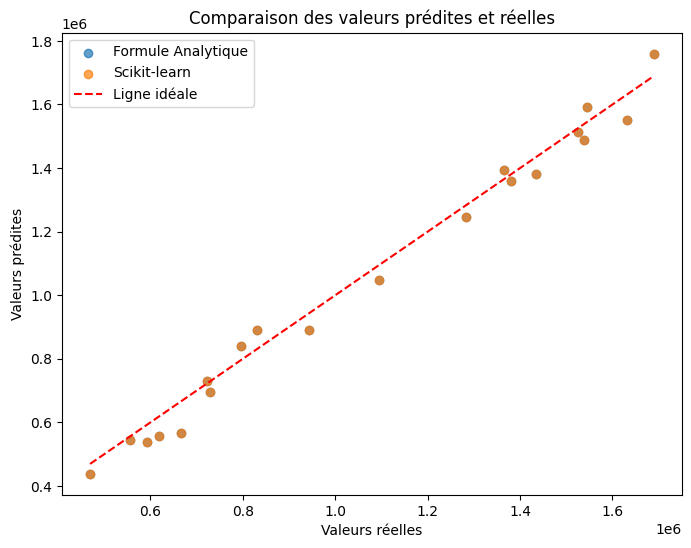

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_analytique, label='Formule Analytique', alpha=0.7)
plt.scatter(y_test, y_pred_sklearn, label='Scikit-learn', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ligne idéale')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison des valeurs prédites et réelles')
plt.legend()
plt.show()

# **Conclusion**

À travers ce TP, nous avons exploré trois approches différentes pour résoudre un problème de régression linéaire multiple : la **formule analytique**, la **descente de gradient**, et l'utilisation de **Scikit-learn**. Voici les principaux points à retenir :

## **1. Performance des modèles**
- Les trois méthodes ont donné des résultats similaires en termes de précision (\( R^2 \)) et d'erreur quadratique moyenne (MSE), ce qui montre que la régression linéaire multiple est robuste quel que soit l'algorithme utilisé.
- La méthode Scikit-learn est la plus rapide et la plus simple à implémenter, mais elle masque les détails mathématiques du processus.
- La descente de gradient, bien qu'un peu plus lente, est utile pour comprendre comment les coefficients sont ajustés de manière itérative.

## **2. Points forts et limites**
- **Formule analytique** : Très précise, mais inefficace pour de grands ensembles de données en raison du calcul de l'inverse de la matrice.
- **Descente de gradient** : Flexible et adaptée aux grands ensembles de données, mais sensible au choix du taux d'apprentissage.
- **Scikit-learn** : Solution pratique et optimisée, mais elle ne permet pas de personnaliser facilement les étapes du calcul.

## **3. Visualisation et interprétation**
- Les graphiques montrent que les valeurs prédites sont proches des valeurs réelles, ce qui confirme la qualité des modèles.
- Cependant, des écarts peuvent apparaître pour certaines observations, indiquant que d'autres variables explicatives ou des transformations des données pourraient améliorer les prédictions.

## **4. Améliorations futures**
- Ajouter des variables explicatives pertinentes ou transformer les variables existantes (par exemple, logarithmes ou polynômes) pour capturer des relations non linéaires.
- Tester des modèles plus avancés comme la régression Ridge ou Lasso pour gérer les problèmes de colinéarité entre les variables explicatives.
- Évaluer la robustesse du modèle sur des ensembles de données plus variés.

---

En conclusion, ce TP a permis de comprendre les bases de la régression linéaire multiple et de comparer différentes approches pour résoudre un problème de prédiction. La méthode choisie dépendra de la taille des données, des besoins en personnalisation et des ressources disponibles.

> 